In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Least square: a recap

We would like to approximate a function evaluated on a (large) number of data points, using a finite dimensional space $V_h$ of dimension $n$, defined as the *span* of a set of basis functions $v_i$: any function in $V_h$ can be expressed as a linear combination of the basis $v_i$:

$$
v_h(x) = v^i v_i(x)
$$
where summation is implied on $i$.

We assume that the function we'd like to approximate is

$$
f: \Omega \mapsto R
$$
and that the only thing we have at our disposal is $N$ pairs $(x_i,y_i)$, i.e., $N$ points $x_i \in \Omega$ in which we know the values $f(x_i)=y_i$.

Given *any* finite dimensional space $V_h$ of dimension $n$ (i.e., any collection of $n$ *linearly independent* functions $v_i : \Omega \mapsto R$), we define the *basis collocation matrix* $B$ as the rectangular matrix
$$
B_{ij} = v_j(x_i), i=1,\dots,N\quad,j=1,\dots,n.
$$

an element of $V_h$ evaluated in all points $x_i$ can be computed easily by the matrix vector product between $B$ and the vector of coefficients $v$:

$$
v_h(x_i) = (B v)_i = B_{ij} v^j = v^j v_j(x_i)
$$

Computing the **least square approximation** of $f$ in $V_h$ is equivalent to finding the element of $V_h$ that minimizes the following functional:

$$
E(v_h) := \frac{1}{2N} \sum_{i=1}^N |v_h(x_i)-y_i|^2
$$

where $E(v_h)$ is the **mean squared error (MSE)** or **mean squared deviation (MSD)** of the approximation $v_h$, i.e., **the average of the squares of the errors**—that is, the **average squared difference between the approximated values and the actual value**.

Expressing $v_h(x_i)$ with the matrix product, $E(v_h)$ can be written as 

$$
E(v_h) := \frac{1}{2N} (Bv-y)^T(Bv-y)
$$

If we want to minimize $E$, we can take its derivative w.r.t. the coefficients $v^i$ and set the derivative to zero, i.e.:

$$
\frac{\partial E}{\partial v^i} = \frac{1}{2N} \frac{(Bv-y)^T(Bv-y)}{\partial v^i}= \frac{1}{N}(B^T Bv - B^Ty)=0
$$
which admits a unique solution if the linear system 
$$
B^T B v = B^T y
$$
has a solution.

Let's try this with $\Omega = [0,1]$, $f(x) = \sin(2\pi x)$, and $V_h = P^{n-1}([0,1])$.

In [2]:
N_data_points = 1000

x = linspace(0,1,N_data_points)

y = sin(2*pi*x)+.5

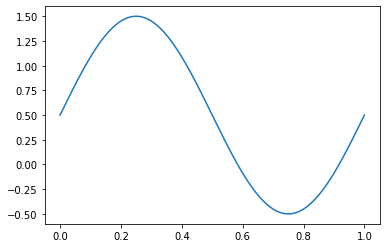

In [3]:
plot(x,y)

In [4]:
n = 6

B = zeros((N_data_points, n))

for d in range(n):
    B[:, d] = x**d


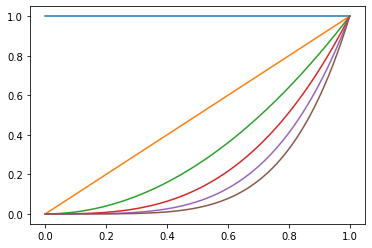

In [5]:
plot(x, B)

Solve the problem: find $p \in P^{\text{degree}}$, such that p is at "minimum distance from data points"


$$ p_i = B_{ij} p^j$$

$$
B_{ij} := (x_i)^j
$$

In [6]:
def Loss(p, y):
    return .5*(B.dot(p)-y).dot(B.dot(p)-y)/len(y)

In [7]:
BtB = B.T.dot(B)
Bty = B.T.dot(y)

In [8]:
p = linalg.solve(BtB, Bty)

In [9]:
plot(x, basis.dot(p))
plot(x,y)

NameError: name 'basis' is not defined

In [10]:
Loss(p,y)

9.362448104579245e-06